In [38]:

import numpy as np
import matplotlib.pyplot as plt


Given an ODE of the form

 $$ \frac{dy}{dt} = f(t, y) $$

where $ y $ is the dependent variable, $ t $ is the independent variable, and $ f(t, y) $ is a given function.

The Heun method works by first predicting the value of $ y $ at the next step using the Euler method (the predictor step), and then it corrects this estimate by calculating the slope at this predicted value and averaging it with the initial slope (the corrector step).

A single step of the Heun's method, from $ t_n $ to $ t_{n+1} = t_n + h $, with $ h $ being the step size:

1. **Predictor step**: Compute an initial estimate $ \tilde{y}_{n+1} $ using the Euler method:
   $$ \tilde{y}_{n+1} = y_n + h \cdot f(t_n, y_n) $$

2. **Corrector step**: Compute the slope at the end of the interval using the predicted value $ \tilde{y}_{n+1} $ and then correct the estimate:
   $$ y_{n+1} = y_n + \frac{h}{2} \left[ f(t_n, y_n) + f(t_{n+1}, \tilde{y}_{n+1}) \right] $$

In [39]:

def heun_method(f, u0, t0, t_end, h):
    """Solve du/dt = f(u, t) by Heun's method.

    Parameters:
    f: the right-hand side function of the ODE
    u0: initial value of u at time t0
    t0: initial time
    t_end: final time
    h: step size

    Returns:
    t: array of time points
    u: array of approximate solution at each time point
    """
    # Number of time steps: we add 1 to include the initial condition
    n_steps = int(np.ceil((t_end - t0) / h)) + 1
    
    # Initialize arrays to hold time points and approximate solution
    t = np.linspace(t0, t_end, n_steps)
    u = np.zeros(n_steps)
    
    # Set initial condition
    u[0] = u0
    
    # Time-stepping loop
    for i in range(n_steps - 1):
        u_pred = u[i] + h * f(u[i], t[i])                   # Predictor step
        u_corr = f(u_pred, t[i+1])                           # Evaluate f at the predicted value
        u[i+1] = u[i] + (h / 2) * (f(u[i], t[i]) + u_corr)  # Corrector step
    
    return t, u


In [40]:

# Define the ODE as a Python function
def f(u, t):
    return -5 * u

# Define the analytical solution
def u_analytical(t, u0):
    return u0 * np.exp(-5 * t)


In [41]:

# Set initial conditions and parameters
u0 = 1     # The initial value of u
t0 = 0     # The initial time
t_end = 2  # The final time we want to solve to
h = 0.1    # Step size


In [42]:

# Solve the ODE
t, u = heun_method(f, u0, t0, t_end, h)


In [43]:

# Calculate the analytical solution
u_true = u_analytical(t, u0)


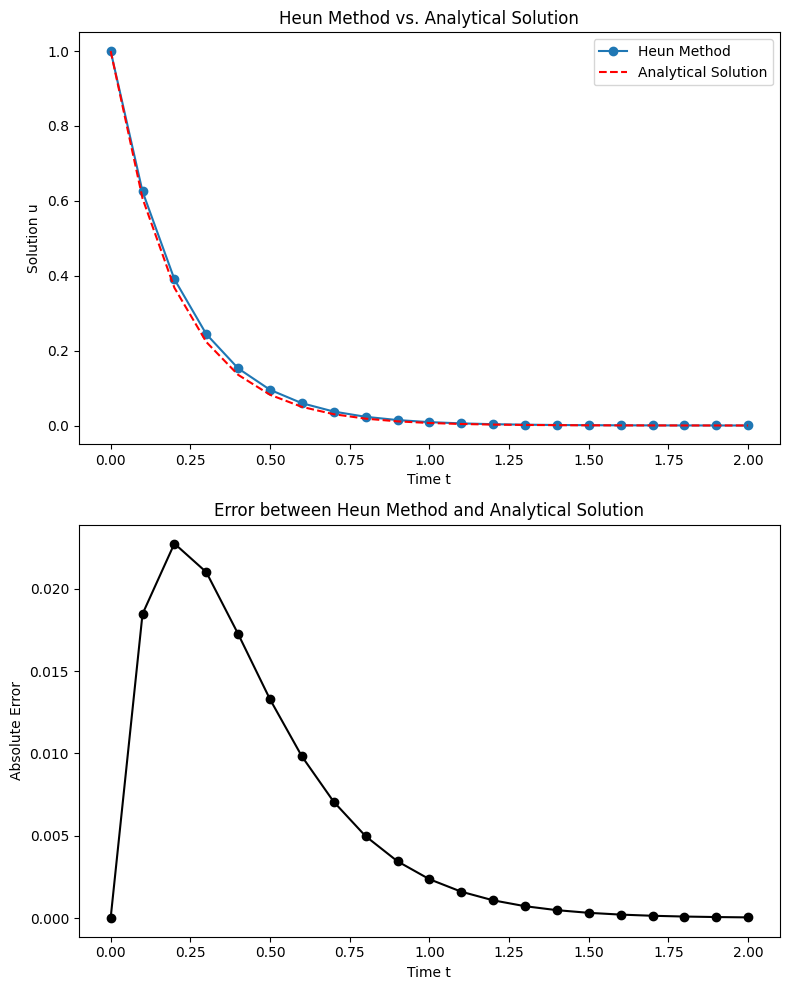

In [44]:

# Plot the results
# Calculate the analytical solution
u_true = u_analytical(t, u0)

# Calculate the error
error = np.abs(u - u_true)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Plot the numerical solution and the analytical solution
axs[0].plot(t, u, 'o-', label='Heun Method')
axs[0].plot(t, u_true, 'r--', label='Analytical Solution')
axs[0].set_xlabel('Time t')
axs[0].set_ylabel('Solution u')
axs[0].set_title('Heun Method vs. Analytical Solution')
axs[0].legend()

# Plot the absolute error
axs[1].plot(t, error, 'k-o')
axs[1].set_xlabel('Time t')
axs[1].set_ylabel('Absolute Error')
axs[1].set_title('Error between Heun Method and Analytical Solution')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

For the ODE $ \frac{du}{dt} = -5u $, using the Crank-Nicolson scheme leads to the following discretized equation:

$$ u_{n+1} = u_n + \frac{\Delta t}{2}(-5u_n - 5u_{n+1}) $$

This can be rearranged to solve for $ u_{n+1} $:

$$ u_{n+1} = \frac{1 - \frac{5\Delta t}{2}}{1 + \frac{5\Delta t}{2}} u_n $$

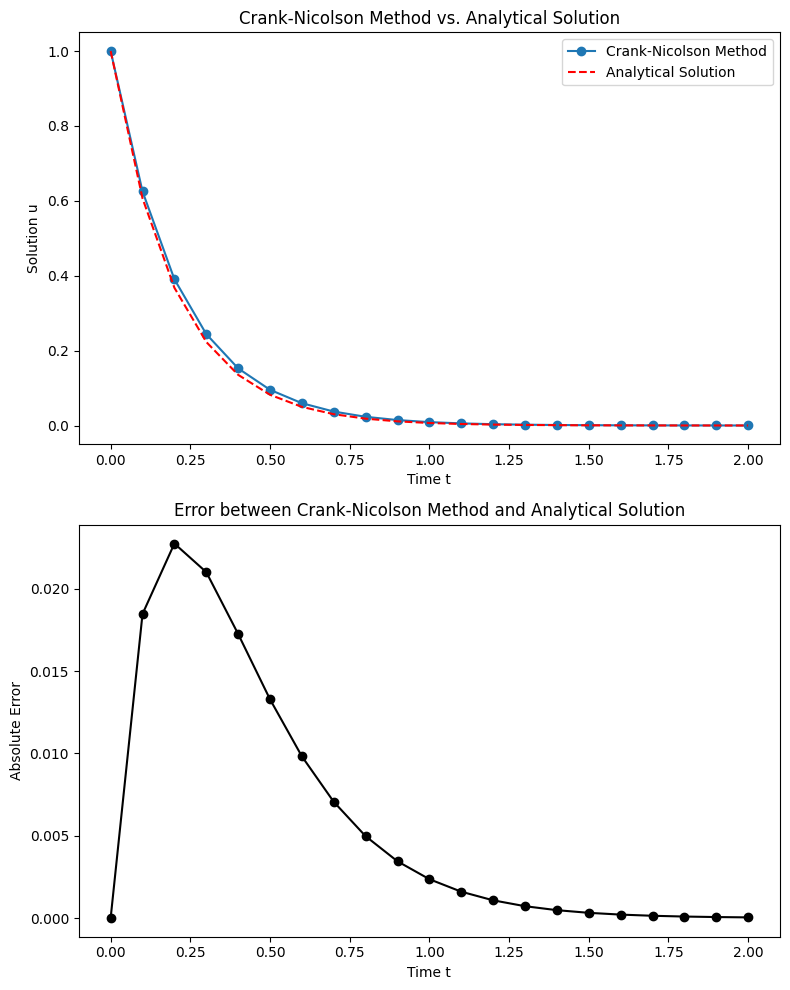

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
u0 = 1         # Initial condition
dt = 0.1      # Time step
t_end = 2      # End time
n_steps = int(t_end / dt)  # Number of steps

# Crank-Nicolson method for du/dt = -5u
def crank_nicolson(u0, dt, n_steps):
    # Initialize the array to store the values of u
    u = np.zeros(n_steps + 1)
    u[0] = u0
    
    # Coefficients for the linear system
    a = 1 + 2.5 * dt
    b = 1 - 2.5 * dt
    
    # Time-stepping loop
    for n in range(n_steps):
        # Update the solution using the Crank-Nicolson formula
        u[n+1] = b / a * u[n]
        
    return u

# Compute the numerical solution
u_cn = crank_nicolson(u0, dt, n_steps)
t = np.linspace(0, t_end, n_steps + 1)

# Analytical solution for comparison
u_true = u_analytical(t, u0)
# Calculate the error
error = np.abs(u - u_true)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Plot the numerical solution and the analytical solution
axs[0].plot(t, u, 'o-', label='Crank-Nicolson Method')
axs[0].plot(t, u_true, 'r--', label='Analytical Solution')
axs[0].set_xlabel('Time t')
axs[0].set_ylabel('Solution u')
axs[0].set_title('Crank-Nicolson Method vs. Analytical Solution')
axs[0].legend()

# Plot the absolute error
axs[1].plot(t, error, 'k-o')
axs[1].set_xlabel('Time t')
axs[1].set_ylabel('Absolute Error')
axs[1].set_title('Error between Crank-Nicolson Method and Analytical Solution')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()


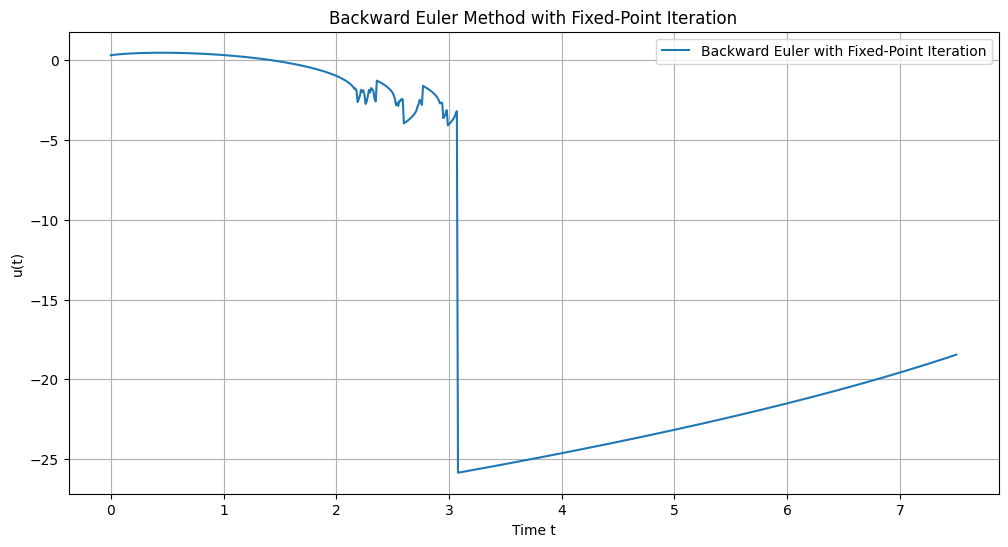

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function for the fixed-point iteration
def g(u_n, u, dt, t_next):
    return u_n + dt * (u - t_next) / (u + t_next)

# Backward Euler method with fixed-point iteration
def backward_euler_fixed_point(u0, dt, t_end, tol = 1e-4):
    n_steps = int(t_end / dt)
    u = np.zeros(n_steps + 1)
    t = np.linspace(0, t_end, n_steps + 1)
    u[0] = u0
    
    for n in range(n_steps):
        t_next = t[n+1]
        u_next = u[n]
        # Fixed-point iteration
        for _ in range(100):  # Limit the maximum number of iterations
            u_next_new = g(u[n], u_next, dt, t_next)
            if np.abs(u_next_new - u_next) < tol:  # Convergence criteria
                break
            u_next = u_next_new
        u[n+1] = u_next
    
    return t, u

# Solve the ODE
u0 = 0.3  # Example initial condition
dt = 0.01
t_end = 7.5
t, u_be_fp = backward_euler_fixed_point(u0, dt, t_end, tol = 1e-4)

# Plotting the results
plt.figure(figsize=(12, 6))

# Numerical solution
plt.plot(t, u_be_fp, '-', label='Backward Euler with Fixed-Point Iteration')

# Labels and legend
plt.title('Backward Euler Method with Fixed-Point Iteration')
plt.xlabel('Time t')
plt.ylabel('u(t)')
plt.legend()
plt.grid(True)

plt.show()


In [18]:


# Solve the ODE
u0 = np.linspace(0.1, 1.5)  # Example initial condition
dt = 0.01
t_end = 7.5
plt.figure(figsize=(12, 6))

for i in range(len(u0)):
    t, u_be_fp = backward_euler_fixed_point(u0[i], dt, t_end, tol = 1e-4)
    plt.plot(t, u_be_fp, '-', label='Backward Euler with Fixed-Point Iteration: u0 = ' + str(u0[i]))


# Plotting the results

# Numerical solution

# Labels and legend
plt.title('Backward Euler Method with Fixed-Point Iteration')
plt.xlabel('Time t')
plt.ylabel('u(t)')
plt.legend()
plt.grid(True)

plt.show()


ValueError: setting an array element with a sequence.